In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pickle

In [43]:
data = pd.read_csv("zomato.csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [44]:
#storing all different currencies of different countries
cur=data['Currency']
cur = set(cur)
cur = list(cur)

In [45]:
#dictionary of different currencies and their conversion rate to dollars
dic={}
dic[cur[0]] = 0.094 #currency in dollars
dic[cur[1]] = 0.19
dic[cur[2]] = 0.000068
dic[cur[3]] = 0.27
dic[cur[4]] = 1.28
dic[cur[5]] = 0.69
dic[cur[6]] = 1
dic[cur[7]] = 0.27
dic[cur[8]] = 0.27
dic[cur[9]] = 0.071
dic[cur[10]] = 0.0057
dic[cur[11]] = 0.014

In [46]:
#converting all currencies to dollars
for i in range(9551):
    data['Average Cost for two'][i] = data['Average Cost for two'][i] * dic[data['Currency'][i]]
data.head()

/Users/Shubhang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [66]:
#dropping all the outliers with avg cost for two>$80 it won't effect the data too much and it would make it more logical
data = data[data['Average Cost for two']<80]
#dropping all votes >1000 as they are working as outliers
data = data[data['Votes']<1000]
#splitting the data between train data and test data
train_Y,test_Y,train_X,test_X = train_test_split(data['Aggregate rating'],data[['Average Cost for two','Votes','Price range']],test_size = 0.2,random_state = 2)
test_X.to_csv('test_X.csv', index = False)
test_Y.to_csv('test_Y.csv', index = False)
train_X.describe()

,Average Cost for two,Votes,Price range
count,7351.000000,7351.000000,7351.000000
mean,9.750646,97.194259,1.754319
std,10.795400,163.869051,0.872739
min,0.000000,0.000000,1.000000
25%,4.000000,4.000000,1.000000
50%,7.000000,27.000000,2.000000
75%,11.000000,111.000000,2.000000
max,77.000000,997.000000,4.000000


In [67]:
test_X.describe()

,Average Cost for two,Votes,Price range
count,1838.000000,1838.000000,1838.000000
mean,9.602285,99.079978,1.763874
std,10.347060,164.379113,0.881529
min,0.000000,0.000000,1.000000
25%,4.000000,5.000000,1.000000
50%,7.000000,28.000000,2.000000
75%,11.000000,116.000000,2.000000
max,79.000000,986.000000,4.000000


In [68]:
test_Y.describe()

count    1838.000000
mean        2.637051
std         1.506124
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [48]:
data[['Votes','Average Cost for two','Price range','Aggregate rating']].describe()

,Votes,Average Cost for two,Price range,Aggregate rating
count,9189.000000,9189.000000,9189.000000,9189.000000
mean,97.571444,9.720971,1.756230,2.605702
std,163.963980,10.706836,0.874465,1.511741
min,0.000000,0.000000,1.000000,0.000000
25%,4.000000,4.000000,1.000000,2.400000
50%,27.000000,7.000000,2.000000,3.200000
75%,112.000000,11.000000,2.000000,3.600000
max,997.000000,79.000000,4.000000,4.900000


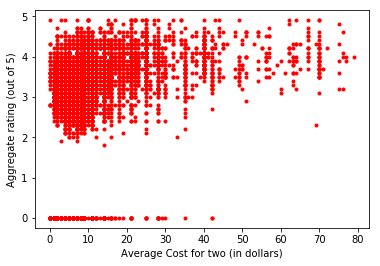

In [49]:
# plot of 'Aggregate rating' vs 'Average Cost for two'
hy = data['Aggregate rating']
hx = data['Average Cost for two']
plt.xlabel('Average Cost for two (in dollars)', fontsize=10)
plt.ylabel('Aggregate rating (out of 5)', fontsize=10)
plt.plot(hx,hy,"r.")
plt.show()

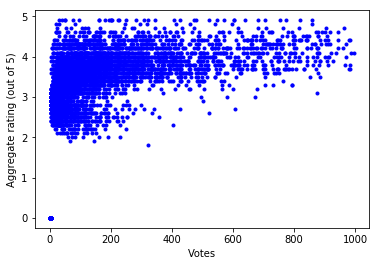

In [50]:
# plot of 'Aggregate rating' vs 'Votes'
hy = data['Aggregate rating']
hx = data['Votes']
plt.xlabel('Votes', fontsize=10)
plt.ylabel('Aggregate rating (out of 5)', fontsize=10)
plt.plot(hx,hy,"b.")
plt.show()

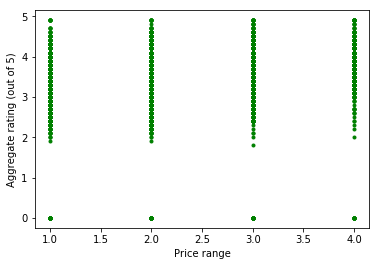

In [51]:
# plot of 'Aggregate rating' vs 'Price range'
hy = data['Aggregate rating']
hx = data['Price range']
plt.xlabel('Price range', fontsize=10)
plt.ylabel('Aggregate rating (out of 5)', fontsize=10)
plt.plot(hx,hy,"g.")
plt.show()

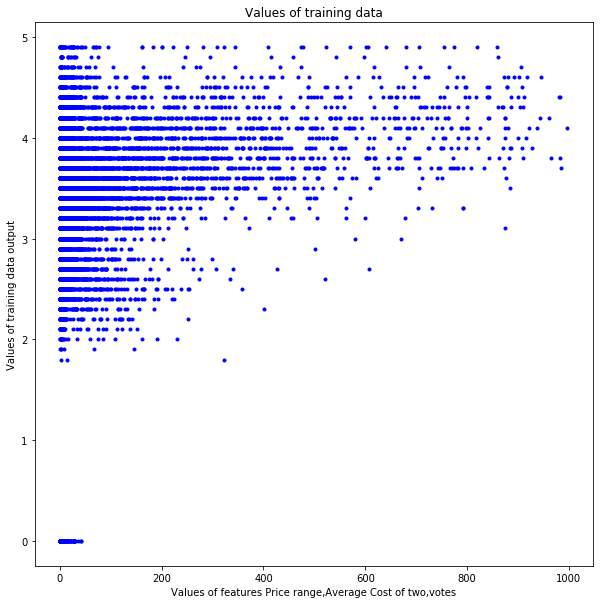

In [52]:
#plot of rating with respect to features Price range,Average Cost of two,votes
plt.figure(figsize=(10,10))
plt.title('Values of training data')
plt.xlabel("Values of features Price range,Average Cost of two,votes")
plt.ylabel("Values of training data output")
plt.plot(train_X,train_Y,"b.")
plt.show()

In [53]:
#training of the model
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(train_X, train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = train_X, y = train_Y, cv = 10)
mean_accuracy = accuracies.mean()
std_accuracy = accuracies.std()
mean_accuracy

0.9362279093547942

In [55]:
#prediction of test data
y_pred = regressor.predict(test_X)
y_pred

array([0.        , 2.99233801, 3.6705    , ..., 2.97850054, 2.96002666,
       3.71233333])

In [56]:
#expected output
test_Y

1328    0.0
3805    3.5
9295    3.7
154     4.1
7491    3.2
7562    2.9
8814    3.1
6248    2.6
1841    3.5
5806    0.0
8028    0.0
6400    3.4
5066    0.0
3732    4.6
2449    3.8
6539    0.0
5397    2.8
1883    3.1
4900    2.6
695     3.9
528     3.9
855     4.1
2972    3.6
159     4.0
3173    0.0
1849    3.5
1686    0.0
2048    3.3
8482    0.0
5474    3.3
       ... 
877     2.9
8575    0.0
7941    3.3
4266    0.0
8800    0.0
6249    3.3
9197    3.9
2266    3.1
715     3.6
2536    4.9
2215    0.0
6200    3.2
6411    2.7
6591    2.7
9550    4.0
9189    3.7
671     3.4
8024    0.0
5805    0.0
4206    4.5
6641    3.2
6932    2.6
2195    3.0
1957    0.0
5874    3.9
3884    3.6
5593    0.0
2831    3.0
4827    2.6
748     4.9
Name: Aggregate rating, Length: 1838, dtype: float64

In [57]:
#our accuracy
regressor.score(test_X, test_Y)

0.9339318094107611

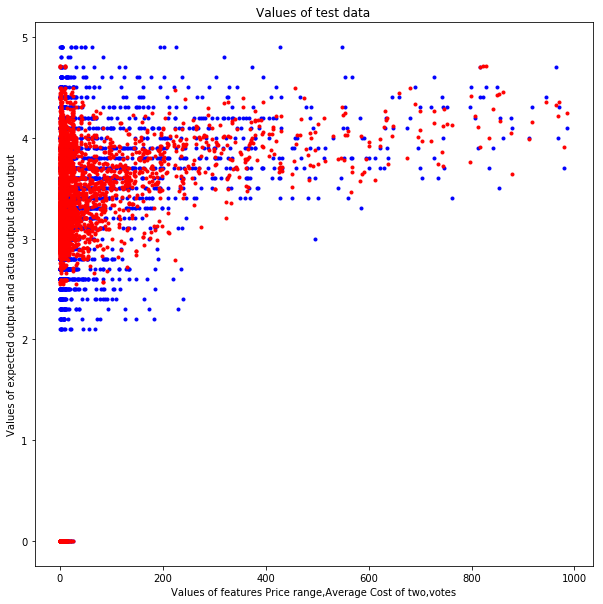

In [58]:
#plot between y actual and y_predicted with respect to test input 
plt.figure(figsize=(10,10))
plt.plot(test_X,test_Y,"b.")
plt.plot(test_X,y_pred,"r.")
plt.title('Values of test data')
plt.xlabel("Values of features Price range,Average Cost of two,votes")
plt.ylabel("Values of expected output and actua output data output")
plt.show()

In [59]:
file_Name = "pickle"
fileObject = open(file_Name,'wb')

In [60]:
pickle.dump(regressor,fileObject)

In [61]:
fileObject.close()

In [62]:
fileObject = open(file_Name,'r')
b = pickle.load(fileObject) 

In [63]:
b.predict(test_X)

array([0.        , 2.99233801, 3.6705    , ..., 2.97850054, 2.96002666,
       3.71233333])

In [64]:
b.score(test_X,test_Y)

0.9339318094107611